In [2]:
import pandas as pd
import seaborn as sns

I have selected the Hitter dataset which I found from Kaggle. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

Now we will read the data from the local drive.

In [3]:
hitter_dat = pd.read_csv("C:/Users/shams/OneDrive/Documents/Dat_viz/Hitters.csv")
hitter_dat.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


So we have imported the csv data file using pandas and printed out first few rows of the data set. 

In [13]:
hitter_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [17]:
hitter_dat.shape

(322, 20)

So the dimension of the data set is (322*20). Now lets describe the data set. 


In [18]:
hitter_dat.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [19]:
"""We can also include the object variable for summary description"""
import numpy as np
hitter_dat.describe(include=np.object)

,League,Division,NewLeague
count,322,322,322
unique,2,2,2
top,A,W,A
freq,175,165,176


Now in order to prepare the data we need to inspect missing element and find a way to either remove or impute missing variables. It depends on the density of the missing variables whether those missing values provide any impact to the data set or not. We will visulaize the missing variables.


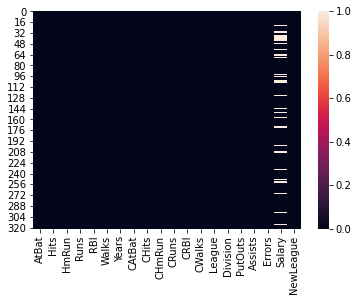

In [20]:
sns.heatmap(hitter_dat.isna())

Now this missing value visualization by seaborn helps us to understand the density of missing valuee. We can see that the salary variable has few variable missing (white stripes). For this work we will remove all the missing or NA values.

In [21]:
hitter = hitter_dat.dropna()
hitter.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


We have remove the missing elements. Now lets again plot the data to see if theirs any missing data left.

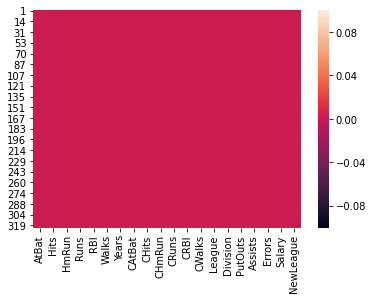

In [22]:
sns.heatmap(hitter.isna())

From the heatmap we can see that there is not missing data left. Now our data is ready and is ready for some exploratory data
visulaization. We will use some low level data visualizations (histograms, boxplots, density plots) to explore data features. 

Now we will plot histogram for this data set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F910811C8>,
      dtype=object)

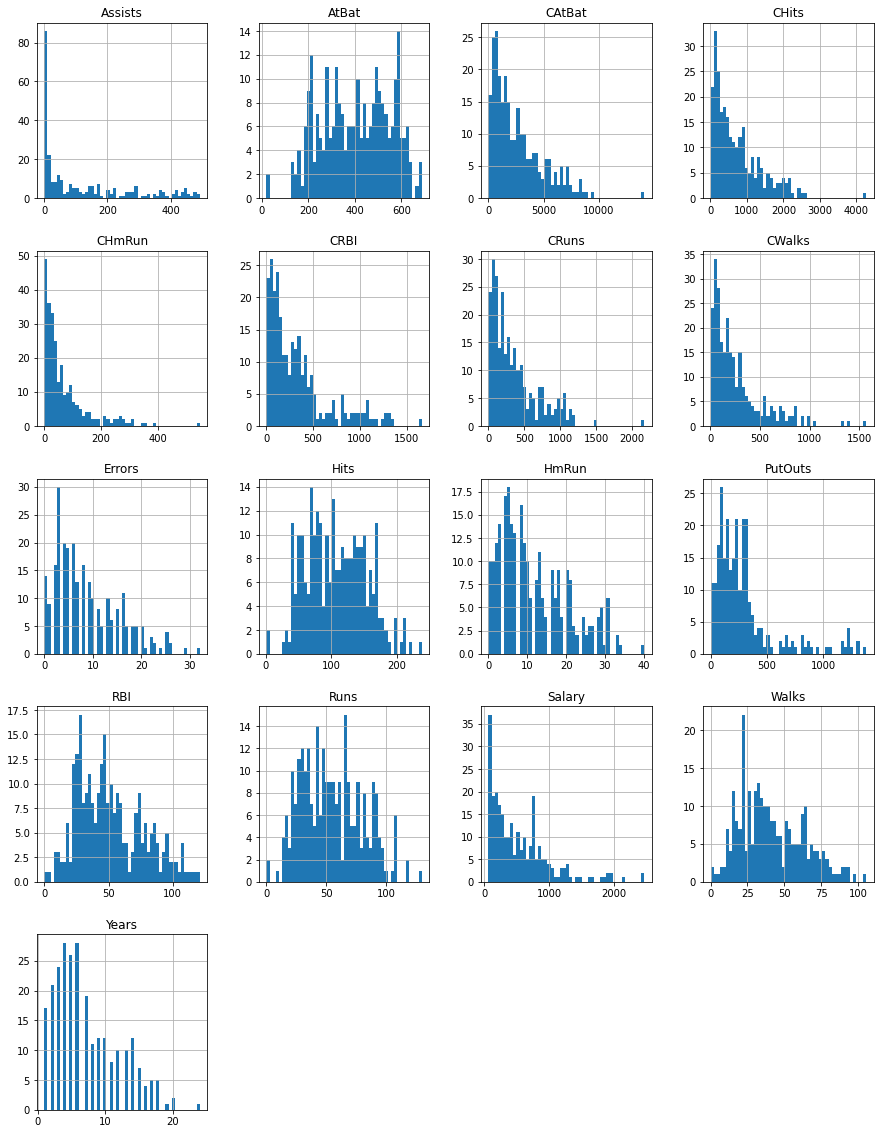

In [27]:
import matplotlib.pyplot as plt
hitter.hist(bins = 50, figsize = (15,20))

Here I have plotted histograms of every variables as it is yet to be determined the important variables in this data set.
Now how about comparing these variables side by side with each other through scatter plot.

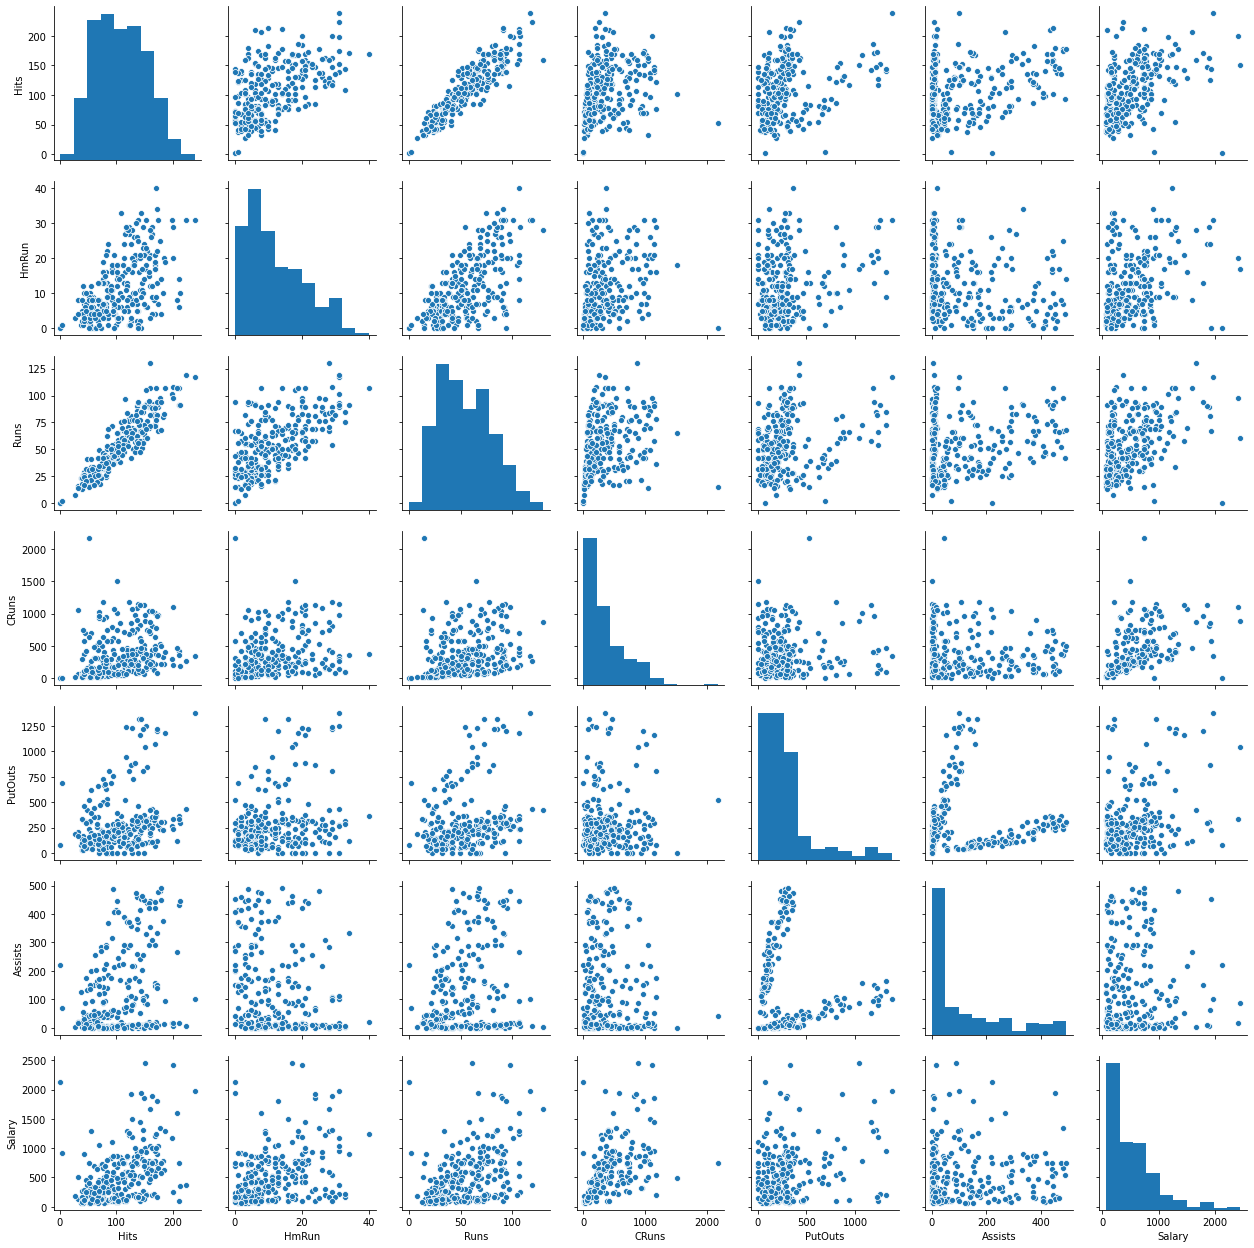

In [28]:
sns.pairplot(hitter[['Hits', 'HmRun','Runs','CRuns','PutOuts','Assists', 'Salary']])

From the histogram and scatter plot comparision between the variables we can see that Hits and Runs are linearly\ncorrelated, which indicates that the more the hits , the more the runs.

In this homework I provided a outline on how I first analyzed the basics of the data set and then started to analyze the completeness of the dataset. For that I inspected missing elements and outliers and fixed it. After that I did some basic data visualization and pair plot to easily understand the significance and correlation between the variable. For the final product I will have to redesign my visualization by layering and editing and cntinually reviewing the design prinicples. And the second step to provide more insight I have to remove insignificant variables whrough some statistical testing in order to provide a meaningful story and correlation of the dataviz. 